# Predicting Median Home Value Using California Census Data

## Overview

When dealing with any asset, a historic issue has been being able to predict fair market value. This is no different with homes, which is why I created my model to try to predict median home value. Using California Census data (which amalgamates data on a district by district basis), my goal was to find which features most influenced home value and then to be able to actually predict a median home value for a district based on these findings. 

## Business Understanding

Profit is the purpose for all firms, so therefore real estate companies, investors, and mortage underwriters would have a vested interest in knowing the current market value of a home before investing, listing or writing a loan on the property. Without knowing the current value, these firms run the risk of overpaying, leaving money on the table or lacking sufficient collateral, ultimately cutting into profits or elimating them entirely. So, by finding the features that drive value and ultimately predicting median home prices, this model will be able to better secure these firms by giving them peace of mind in that each of their decisions will be backed by a data driven solution. 

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree
#importing everything we need

In [2]:
data = pd.read_csv("housing.csv")
#importing the data 

## Data Exploration

In this section I do some data exploration on the whole data set before doing a train test split. This helps me get a good idea of the data in its whole form. Also, it makes more logical sense to me this way before doing any transformations, so I can recognize any apparent visible patterns.

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.corr()
#checking the data for correlations and as expected, certain features correlate with house value heavily ie median income 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

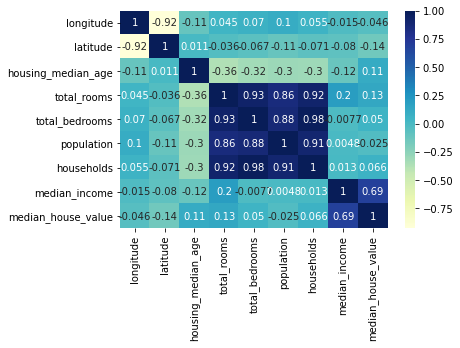

In [6]:
sns.heatmap(data.corr(), annot=True, cmap= "YlGnBu")
#using a heatmap to accomplish the same as above

In [7]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
data.info()
# here I see that total_bedrooms is missing some entries so I am going to drop the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

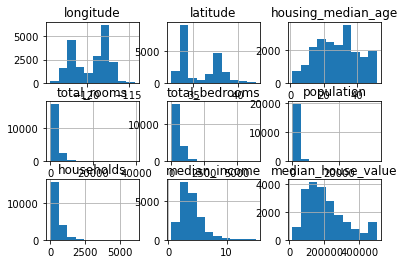

In [9]:
data.hist()

## Data Prepping/Manipulation

In this section, I eliminate all the nulls from the data and perform the train test split. After that I transform some of the data to make it easier to use ML on. Some basic transformations and scaling can go a long way.I also reconfirm some things I saw in the whole data within the training data exclusively. Setting myself up here allows me to keep my models separate without a lot of code further down the line. 

In [10]:
data.dropna(inplace=True)
#here I am dropping all null values from the data

In [11]:
X= data.drop(['median_house_value'], axis=1)
y= data['median_house_value']
#defining x and y for test train split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
#initiating train test split

In [13]:
train_data= X_train.join(y_train)
#joining here to do more exploration of features with training data

In [14]:
train_data['population'] = np.log(train_data['population']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['households'] = np.log(train_data['households']+1)
#transforming the data using log because of the skew of the data 

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
#here i am using one hot encoding for ocean proximity to better determine how ocean proximity affects median home value, logically it makes sense that the closer to the ocean the higher the value but this allows us to see more in depth

In [16]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
#setting median_house value as target and adding our log transformation in X_train

<AxesSubplot:>

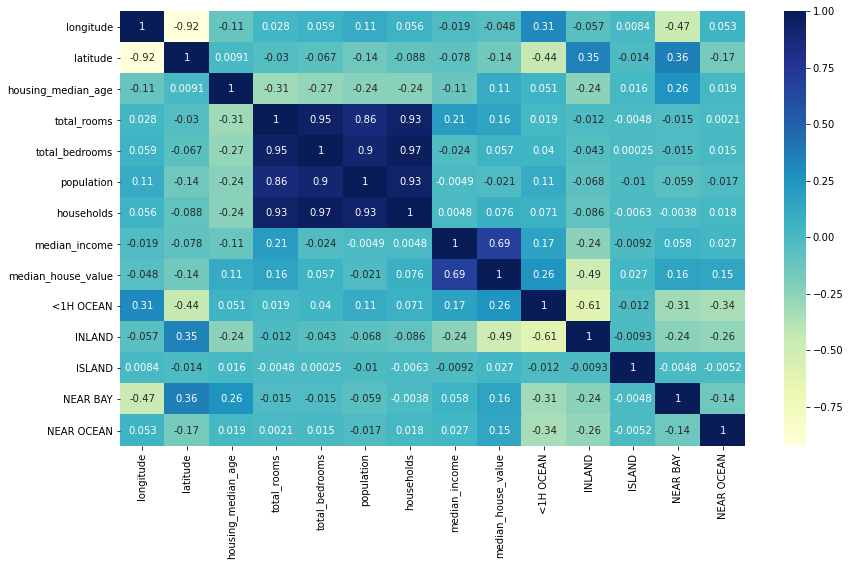

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True, cmap= "YlGnBu")
#checking correlation heatmap for training data

Below I am just repeating the steps I took for the training data on the testing data

In [18]:
test_data= X_test.join(y_test)


                                                                        

In [19]:
test_data['population'] = np.log(test_data['population']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['households'] = np.log(test_data['households']+1)

In [20]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [21]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
#setting median house value as target variable

In [22]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#scaling the data for model evaluation

## Linear Regression- Prelim Model

Here, I try the most apparent modeling technique for this type of question. Although the results are pretty good, I decided to experiment with other techniqes, with my primary focus being on Random Forest.

In [23]:
reg= LinearRegression()
reg.fit(X_train, y_train)
#initial model without scaling

LinearRegression()

In [24]:
reg.score(X_test, y_test)

0.6684441428639085

In [38]:

reg.fit(X_train_scaled, y_train)
#model with scaling

LinearRegression()

In [39]:
reg.score(X_test_scaled, y_test)

0.6684441428639087

## Decision Tree

I figured decision trees would not output the best result and regardless of any data preparation, the results are really bad. 

In [33]:
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
#model without scaling

DecisionTreeRegressor()

In [35]:
model.score(X_test, y_test)

0.6461845348711861

In [36]:
model = tree.DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)
#model with scaling

DecisionTreeRegressor()

In [37]:
model.score(X_test_scaled, y_test)

0.6456967393956676

## Random Forest Model

Finally, I settled on Random Forest and the results speak for themselves. 

In [29]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
#model without scaling

RandomForestRegressor()

In [30]:
forest.score(X_test, y_test)

0.8183122130063447

In [31]:
forest.fit(X_train_scaled, y_train)
#model with scaling

RandomForestRegressor()

In [32]:
forest.score(X_test_scaled, y_test)

0.8188387771666218